In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [28]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5)

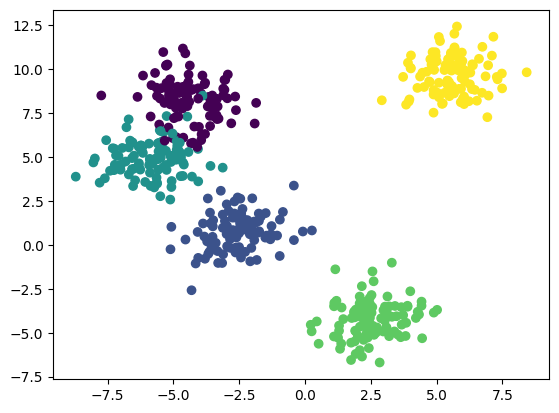

In [29]:
plt.scatter(x[:,0],x[:,1],c=y)

In [30]:
colors=['green','yellow','blue','cyan','red']
clusters={}
k=5
for idx in range(k):
    center=10*(2*(np.random.random((x.shape[1],))-1))
    points=[]
    cluster={
        'center':center,
        'points':[],
        'color':colors[idx]
    }
    clusters[idx]=cluster
clusters

{0: {'center': array([-5.27449968, -0.78572254]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-12.70691388, -12.28301753]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([ -9.70622785, -10.42128268]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([ -8.2645271 , -13.31403144]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-11.13719566,  -6.67818124]),
  'points': [],
  'color': 'red'}}

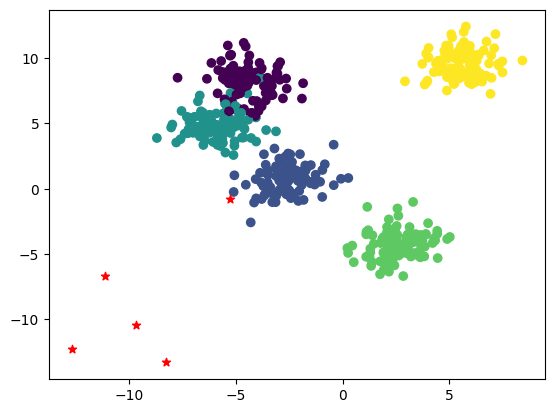

In [31]:
plt.scatter(x[:,0],x[:,1],c=y)
for i in clusters:
    center=clusters[i]['center']
    plt.scatter(center[0],center[1],marker="*",c="red")
plt.show()

In [32]:
def distance_(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))


In [33]:
k=5
def assing_cluster():
    for idx in range(x.shape[0]):
        distance=[]
        curr_x=x[idx]
        for i in range(k):

            center=clusters[i]['center']
            dis=distance_(curr_x,center)
            distance.append(dis)
        curr_cluster=np.argmin(distance)
        clusters[curr_cluster]['points'].append(curr_x)

In [34]:
assing_cluster()

In [35]:
clusters

{0: {'center': array([-5.27449968, -0.78572254]),
  'points': [array([-5.6955194 ,  9.78317042]),
   array([ 2.18069232, -3.78282747]),
   array([-1.73855871,  0.76840582]),
   array([-6.30730743,  4.64127418]),
   array([ 5.68163252, 11.19696605]),
   array([-2.93052245,  9.69544763]),
   array([-1.75547056,  1.78326262]),
   array([5.42415937, 9.33723322]),
   array([-4.06474098,  5.45945676]),
   array([-2.97296332,  2.30635947]),
   array([-4.53983168,  0.302734  ]),
   array([-5.15215308,  8.42764825]),
   array([-4.99505929,  8.31680651]),
   array([5.37407497, 9.2019807 ]),
   array([-3.10566161,  8.88929093]),
   array([-3.04190299,  1.3600171 ]),
   array([ 5.00331612, 10.44987608]),
   array([ 4.92174404, 10.37386125]),
   array([-2.73998624,  0.83980112]),
   array([-2.8985453 ,  1.92727178]),
   array([-5.51715802,  6.53067879]),
   array([-5.11025033,  7.99444601]),
   array([-7.60233251,  3.791855  ]),
   array([-4.46987016,  7.30156707]),
   array([ 2.57597213, -4.742055

In [36]:
def plot_cluster():
    for i in clusters:
        pts=np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center=clusters[i]['center']
        plt.scatter(center[0],center[1],c="black",marker="^")
        
    plt.show()

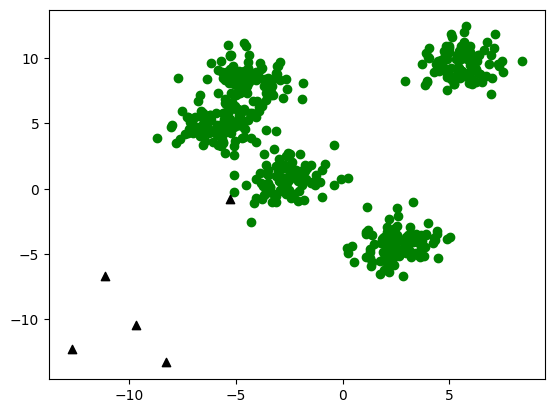

In [37]:
plot_cluster()

In [38]:
def update_cluster():
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            new=pts.mean(axis=0)
            clusters[i]['center']=new
        clusters[i]['points']=[]

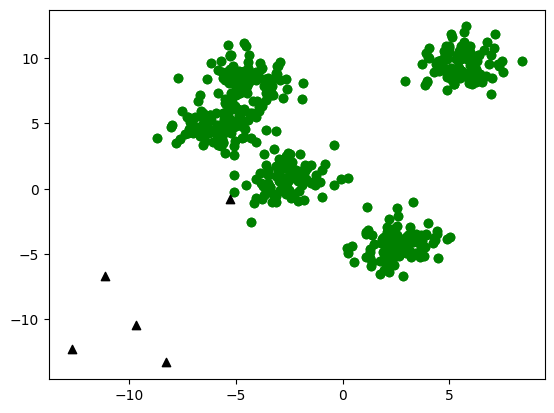

In [39]:
assing_cluster()
plot_cluster()
update_cluster()

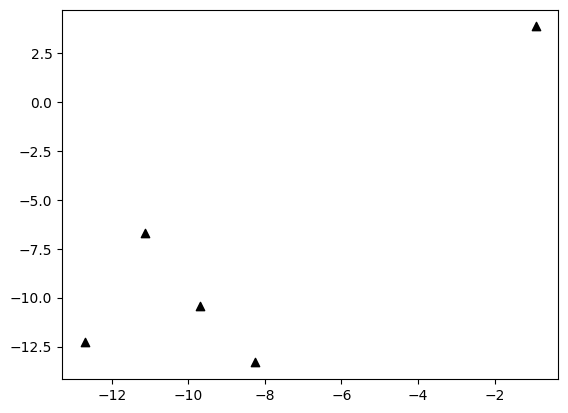

In [40]:
plot_cluster()

C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


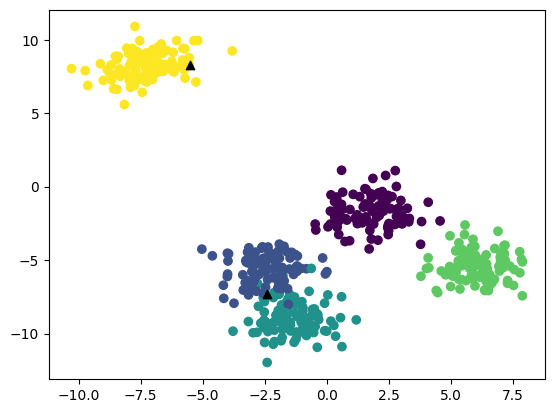

In [41]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
x,y=make_blobs(n_features=2,n_samples=500,centers=5)
km.fit(x,y)
center=km.cluster_centers_
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(center[0],center[1],marker="^",c="black")

In [63]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
x,y=make_blobs(n_samples=500,n_features=10,centers=5)
km.fit(x,y)


C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

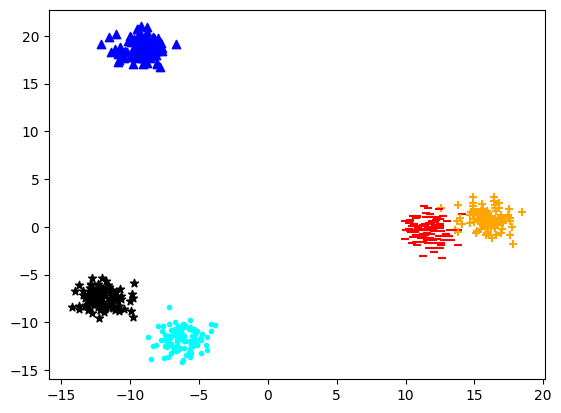

In [70]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2).fit(x).transform(x)
for i in range(0,pca.shape[0]):
    if km.labels_[i]==0:
        c1_5=plt.scatter(pca[i,0],pca[i,1],c="orange",marker="+")
    elif km.labels_[i]==1:
        c2_5=plt.scatter(pca[i,0],pca[i,1],c="black",marker="*")
    elif km.labels_[i]==2:
        c3_5=plt.scatter(pca[i,0],pca[i,1],c="blue",marker="^")
    elif km.labels_[i]==3:
        c4_5=plt.scatter(pca[i,0],pca[i,1],c="red",marker="_")
    elif km.labels_[i]==4:
        c4_5=plt.scatter(pca[i,0],pca[i,1],c="cyan",marker=".")
plt.show()